<a href="https://colab.research.google.com/github/ra1111/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Generating a sample dataset for movies and user ratings
np.random.seed(42)  # For reproducibility

# Sample data parameters
num_users = 100  # Number of users
num_movies = 10  # Number of movies
movie_titles = [f"Movie_{i+1}" for i in range(num_movies)]

# Creating random ratings (scale of 1 to 5, with 0 as not rated)
ratings = np.random.randint(0, 6, size=(num_users, num_movies))

# Creating a DataFrame
df_ratings = pd.DataFrame(ratings, columns=movie_titles)
df_ratings.insert(0, "User_ID", range(1, num_users + 1))

# Displaying the first few rows of the DataFrame
df_ratings.head()


,User_ID,Movie_1,Movie_2,Movie_3,Movie_4,Movie_5,Movie_6,Movie_7,Movie_8,Movie_9,Movie_10
0,1,3,4,2,4,4,1,2,2,2,4
1,2,3,2,5,4,1,3,5,5,1,3
2,3,4,0,3,1,5,4,3,0,0,2
3,4,2,1,3,3,5,5,5,2,3,3
4,5,0,2,4,2,4,0,1,3,0,3


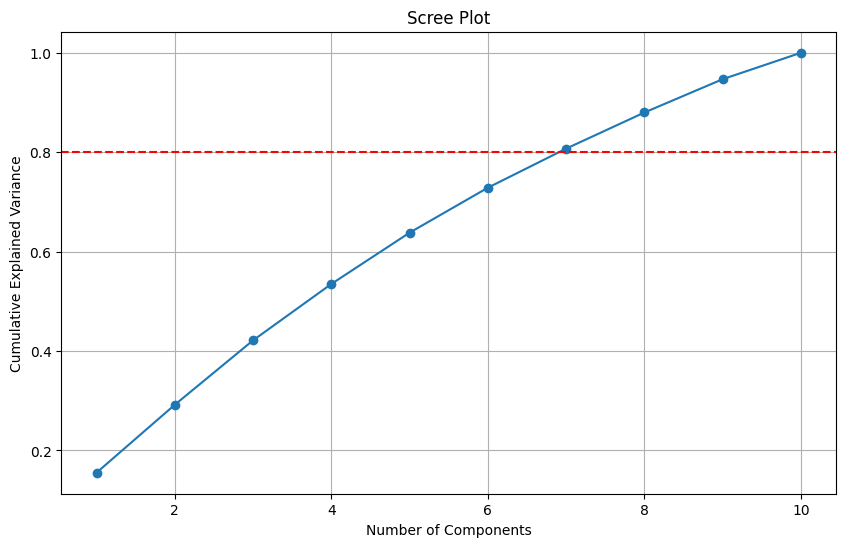

(7, (100, 7))

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ratings.drop('User_ID', axis=1))

# Computing the Covariance Matrix
covariance_matrix = np.cov(scaled_data.T)

# Obtaining the Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Selecting the Principal Components
# Retaining components that explain a substantial portion of the variance
# For demonstration, let's choose components that explain 80% of the variance

# Sorting the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculating the cumulative variance
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Determining the number of components to retain
num_components_to_retain = np.argmax(cumulative_variance >= 0.80) + 1

# Transforming the data using the selected eigenvectors
pca_data = np.dot(scaled_data, sorted_eigenvectors[:, :num_components_to_retain])

# Plotting the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Output the number of components to retain
num_components_to_retain, pca_data.shape


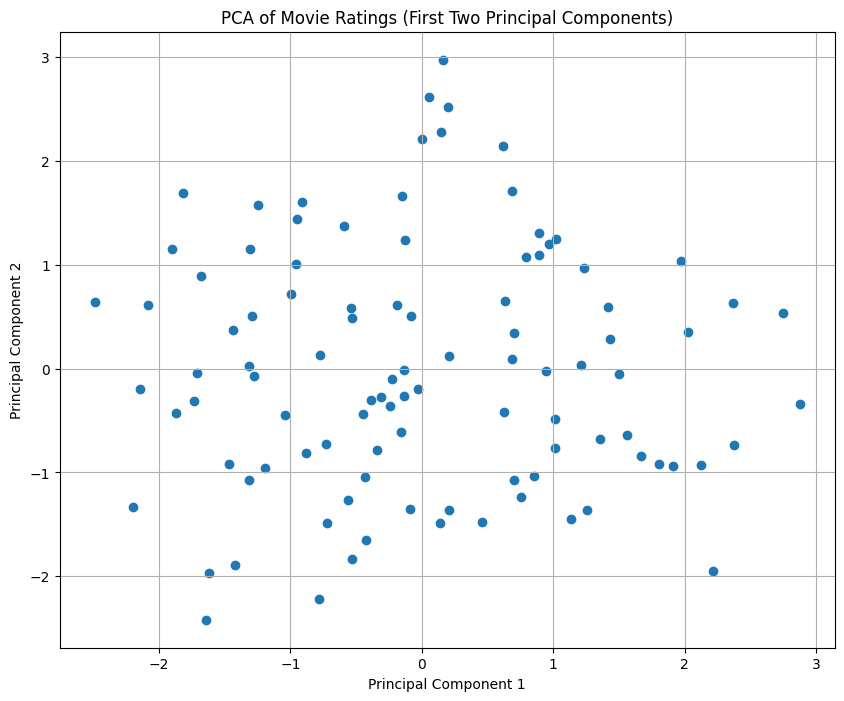

array([0.15526328, 0.13666324, 0.12957994, 0.11338603, 0.10322033,
       0.09045334, 0.07860545])

In [ ]:
# Continuing with PCA using sklearn for ease of use and comparison
# Using the number of components determined earlier (7)
pca_sklearn = PCA(n_components=num_components_to_retain)
principal_components_sklearn = pca_sklearn.fit_transform(scaled_data)

# Creating a DataFrame for the principal components obtained through sklearn
pca_df_sklearn = pd.DataFrame(data=principal_components_sklearn,
                              columns=[f'Principal Component {i+1}' for i in range(num_components_to_retain)])

# Adding the User_ID back for reference
pca_df_sklearn['User_ID'] = df_ratings['User_ID']

# Displaying the first few rows of the DataFrame
pca_df_sklearn.head()

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_sklearn['Principal Component 1'], pca_df_sklearn['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Movie Ratings (First Two Principal Components)')
plt.grid(True)
plt.show()

# Explained variance ratio for each principal component
pca_sklearn.explained_variance_ratio_
